<a href="https://colab.research.google.com/github/Sazahiba/AssignmentQ2/blob/main/Concrete_Strength_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
from tensorflow.keras import models, layers , optimizers

In [2]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [3]:
df= pd.read_csv("/content/gdrive/MyDrive/DL Data Sets/compresive_strength_concrete.csv")

In [4]:
df.head()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [5]:
df.isnull().sum()

Cement (component 1)(kg in a m^3 mixture)                0
Blast Furnace Slag (component 2)(kg in a m^3 mixture)    0
Fly Ash (component 3)(kg in a m^3 mixture)               0
Water  (component 4)(kg in a m^3 mixture)                0
Superplasticizer (component 5)(kg in a m^3 mixture)      0
Coarse Aggregate  (component 6)(kg in a m^3 mixture)     0
Fine Aggregate (component 7)(kg in a m^3 mixture)        0
Age (day)                                                0
Concrete compressive strength(MPa, megapascals)          0
dtype: int64

In [6]:
df.describe()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   Cement (component 1)(kg in a m^3 mixture)              1030 non-null   float64
 1   Blast Furnace Slag (component 2)(kg in a m^3 mixture)  1030 non-null   float64
 2   Fly Ash (component 3)(kg in a m^3 mixture)             1030 non-null   float64
 3   Water  (component 4)(kg in a m^3 mixture)              1030 non-null   float64
 4   Superplasticizer (component 5)(kg in a m^3 mixture)    1030 non-null   float64
 5   Coarse Aggregate  (component 6)(kg in a m^3 mixture)   1030 non-null   float64
 6   Fine Aggregate (component 7)(kg in a m^3 mixture)      1030 non-null   float64
 7   Age (day)                                              1030 non-null   int64  
 8   Concrete compressive strength(MPa, megapascals)  

In [8]:
df.keys()# to gets columns name

Index(['Cement (component 1)(kg in a m^3 mixture)',
       'Blast Furnace Slag (component 2)(kg in a m^3 mixture)',
       'Fly Ash (component 3)(kg in a m^3 mixture)',
       'Water  (component 4)(kg in a m^3 mixture)',
       'Superplasticizer (component 5)(kg in a m^3 mixture)',
       'Coarse Aggregate  (component 6)(kg in a m^3 mixture)',
       'Fine Aggregate (component 7)(kg in a m^3 mixture)', 'Age (day)',
       'Concrete compressive strength(MPa, megapascals) '],
      dtype='object')

In [9]:
# split dataframe into input and output
data=df.iloc[:,:8]

targets=df.iloc[:,-1]

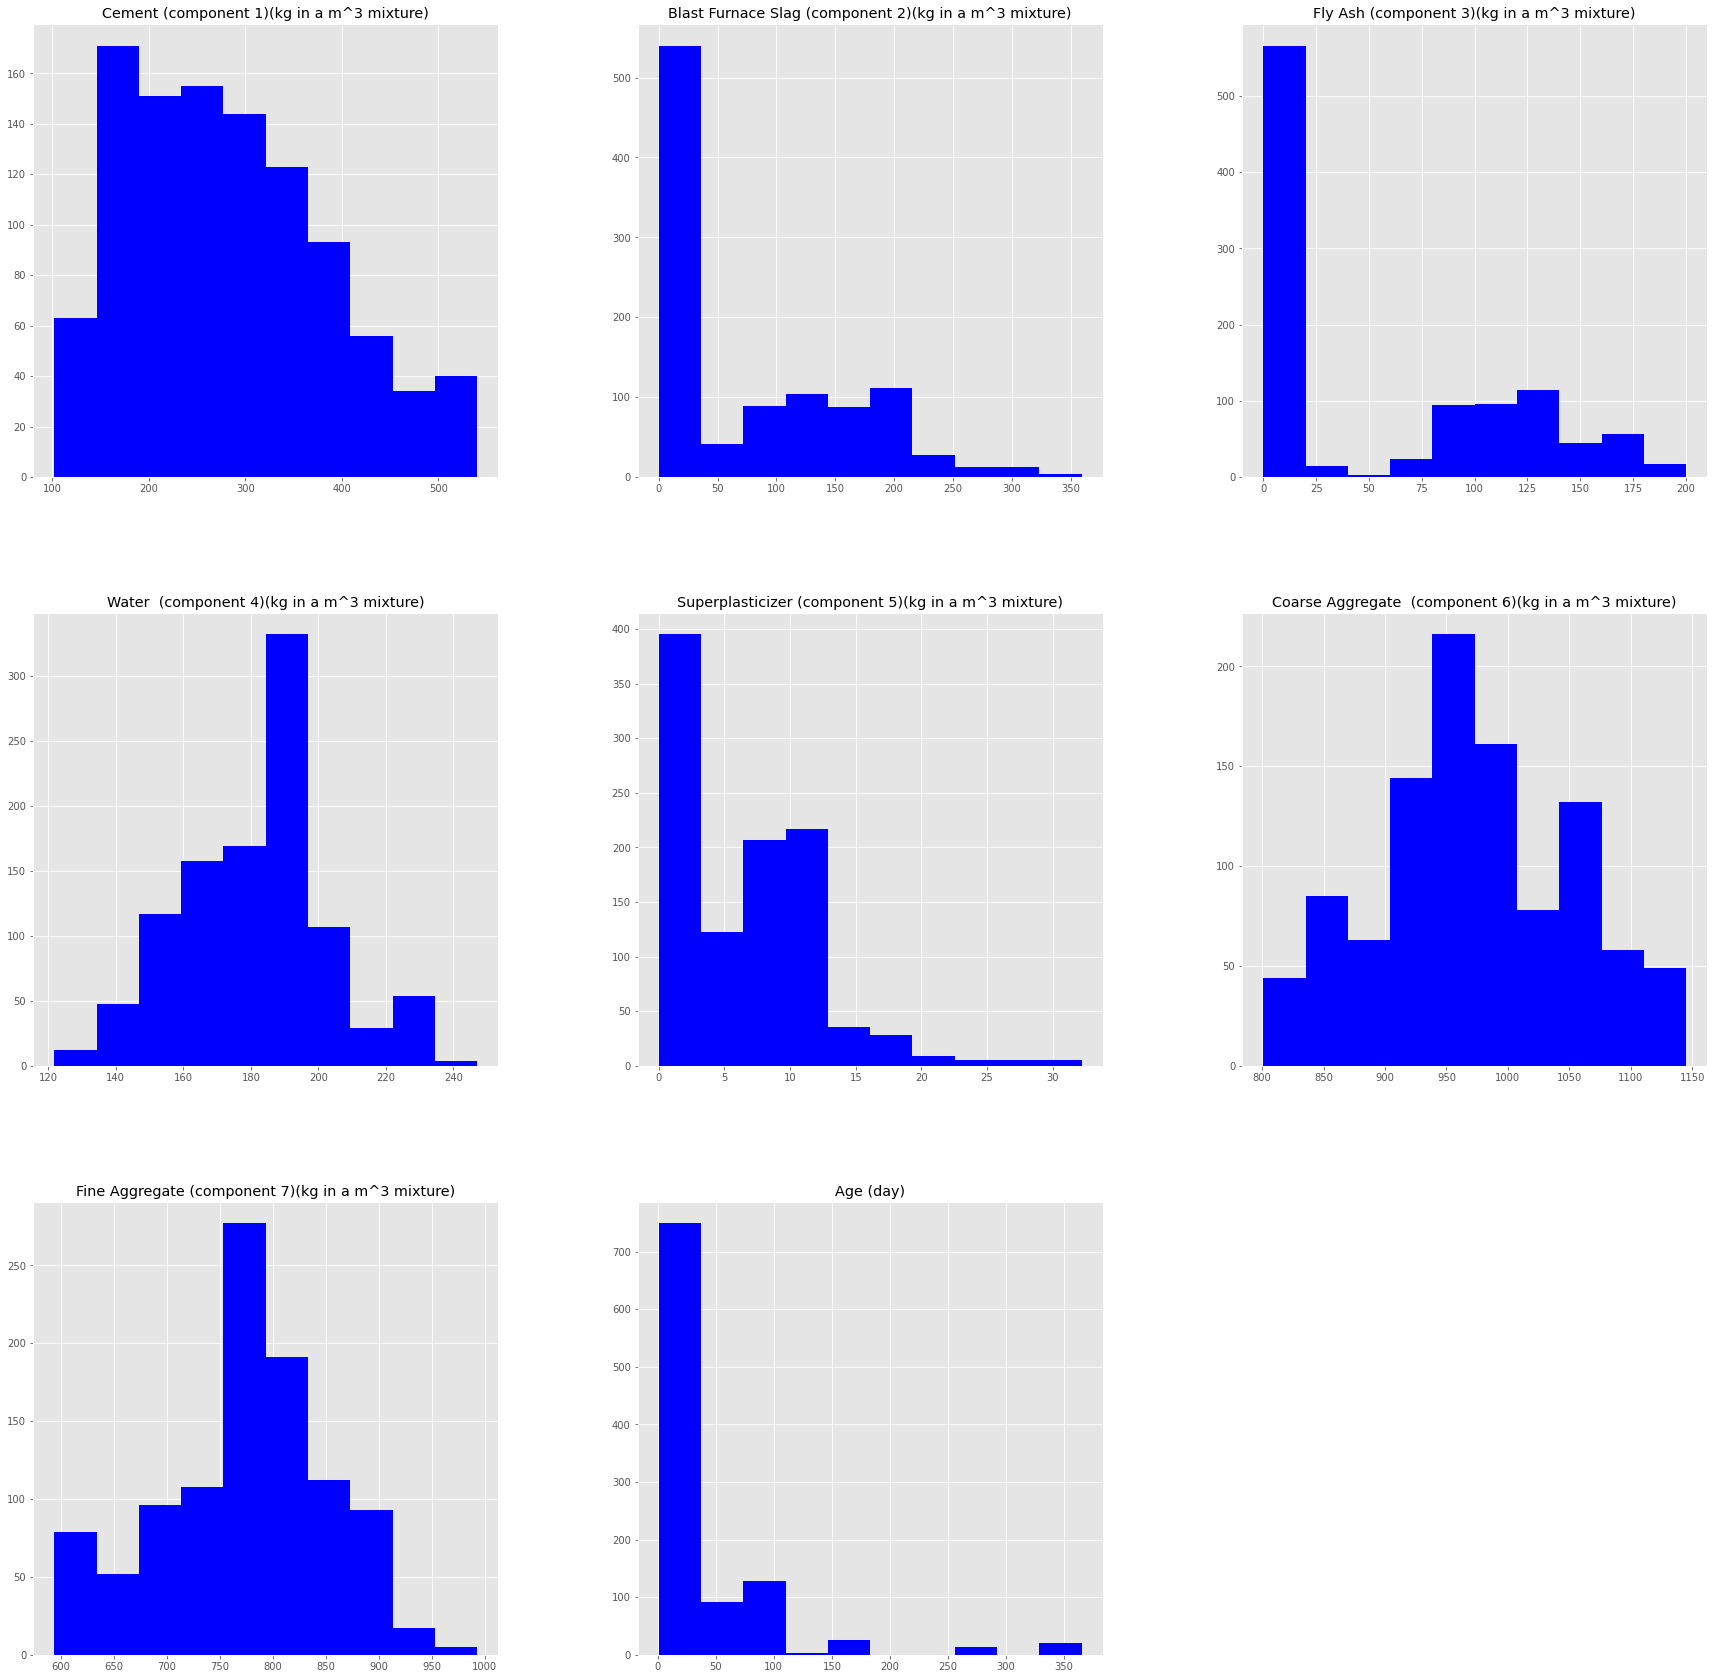

In [11]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')
pd.DataFrame.hist(data, figsize = [30,30], color="Blue")
plt.show()

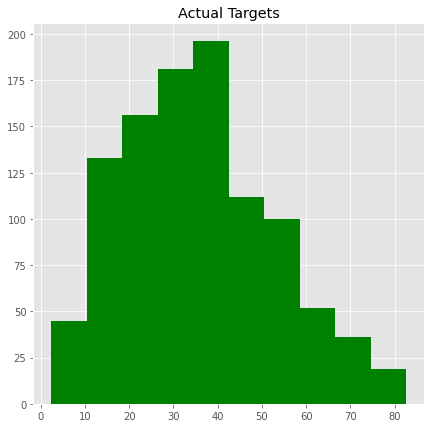

In [12]:
plt.style.use('ggplot')
targets.hist( figsize = [7,7], color="Green")
plt.title("Actual Targets")
plt.show()

In [13]:
# standardized or normalized the data (input variables)
mean = data.mean(axis=0)
data-= mean
std = data.std(axis=0)
data/= std

In [14]:
# data spliting using machine learning spliting method
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(data,targets,random_state=0)

In [15]:
print(f"Shape of training data :{X_train.shape},\nShape of training targets:{y_train.shape}")

Shape of training data :(772, 8),
Shape of training targets:(772,)


In [16]:
print(f"Shape of testing data :{X_test.shape},\nShape of testing targets:{y_test.shape}")

Shape of testing data :(258, 8),
Shape of testing targets:(258,)


In [17]:
X_train= np.asarray(X_train).astype('float32')
X_test= np.asarray(X_test).astype('float32')

In [18]:
val_X = X_train[:230]
partial_X_train=X_train[230:]
val_y=y_train[:230]
partial_y_train=y_train[230:]

In [19]:
from keras import models, layers , optimizers

In [20]:
network=models.Sequential()
network.add(tf.keras.layers.Dense(10,activation="relu",input_shape=(X_train.shape[1],)))
network.add(tf.keras.layers.Dense(8,activation="relu"))
network.add(tf.keras.layers.Dense(1))

In [21]:
network.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                90        
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 88        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 9         
Total params: 187
Trainable params: 187
Non-trainable params: 0
_________________________________________________________________


In [22]:
network.compile(optimizer=optimizers.RMSprop(lr=0.001), loss="mse",metrics=['mae'])

In [23]:
history=network.fit(partial_X_train,partial_y_train,epochs=10,validation_data=(val_X,val_y),batch_size=1,verbose=1)

Epoch 1/10
542/542 [==============================] - 2s 2ms/step - loss: 1411.1891 - mae: 33.7936 - val_loss: 1158.0994 - val_mae: 29.9887
Epoch 2/10
542/542 [==============================] - 1s 1ms/step - loss: 762.6990 - mae: 23.1453 - val_loss: 406.7930 - val_mae: 16.4567
Epoch 3/10
542/542 [==============================] - 1s 1ms/step - loss: 308.6670 - mae: 13.9617 - val_loss: 242.2532 - val_mae: 12.5142
Epoch 4/10
542/542 [==============================] - 1s 1ms/step - loss: 210.6756 - mae: 11.8800 - val_loss: 200.9111 - val_mae: 11.1002
Epoch 5/10
542/542 [==============================] - 1s 1ms/step - loss: 169.3796 - mae: 10.6094 - val_loss: 181.3358 - val_mae: 10.6946
Epoch 6/10
542/542 [==============================] - 1s 1ms/step - loss: 171.2012 - mae: 10.5608 - val_loss: 168.5656 - val_mae: 10.4497
Epoch 7/10
542/542 [==============================] - 1s 1ms/step - loss: 145.7432 - mae: 9.8313 - val_loss: 163.1794 - val_mae: 10.0387
Epoch 8/10
542/542 [=============

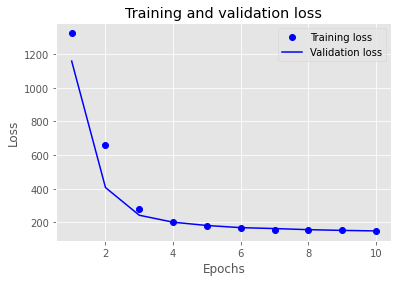

In [24]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [25]:
all_mae_histories=[]
mae_history = history.history['val_mae']
all_mae_histories.append(mae_history)
print(all_mae_histories)

[[29.988698959350586, 16.45673179626465, 12.514239311218262, 11.100163459777832, 10.694561004638672, 10.44965934753418, 10.038702011108398, 9.896024703979492, 9.822038650512695, 9.731135368347168]]


In [26]:
average_mae_history = [np.mean([x[i] for x in all_mae_histories]) for i in range(2)]
print(average_mae_history)

[29.988698959350586, 16.45673179626465]


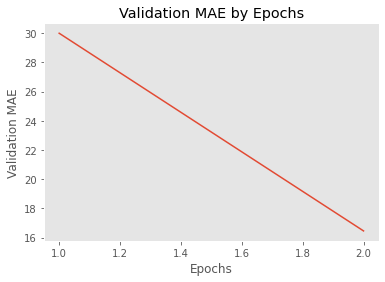

In [27]:
plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.title('Validation MAE by Epochs')
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.grid()
plt.show()

In [28]:
test_mse_score, test_mae_score = network.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 127.6457 - mae: 9.1850


In [29]:
test_mae_score

9.185037612915039

In [30]:
y_pred = network.predict(X_test)
y_pred

array([[32.553932],
       [12.991623],
       [59.361076],
       [44.851646],
       [20.643621],
       [60.157078],
       [49.49456 ],
       [30.744959],
       [50.492428],
       [41.93923 ],
       [21.491652],
       [41.084103],
       [21.706724],
       [27.182354],
       [51.02038 ],
       [52.852833],
       [35.15529 ],
       [26.339579],
       [43.474487],
       [26.259113],
       [44.512463],
       [35.522682],
       [29.598331],
       [43.024456],
       [19.9173  ],
       [20.164469],
       [84.18961 ],
       [30.21506 ],
       [52.852833],
       [47.72737 ],
       [21.142073],
       [35.523026],
       [14.331239],
       [27.371231],
       [21.31965 ],
       [13.653662],
       [59.818565],
       [27.52802 ],
       [24.035677],
       [26.072193],
       [52.334297],
       [27.399914],
       [23.883268],
       [30.241774],
       [48.61396 ],
       [54.008713],
       [25.859268],
       [37.049168],
       [36.985283],
       [66.01885 ],


In [31]:
y_test

747    26.06
718    10.35
175    79.30
828    74.99
713     9.69
       ...  
453    31.72
906    39.42
757    18.13
875    18.28
62      9.87
Name: Concrete compressive strength(MPa, megapascals) , Length: 258, dtype: float64

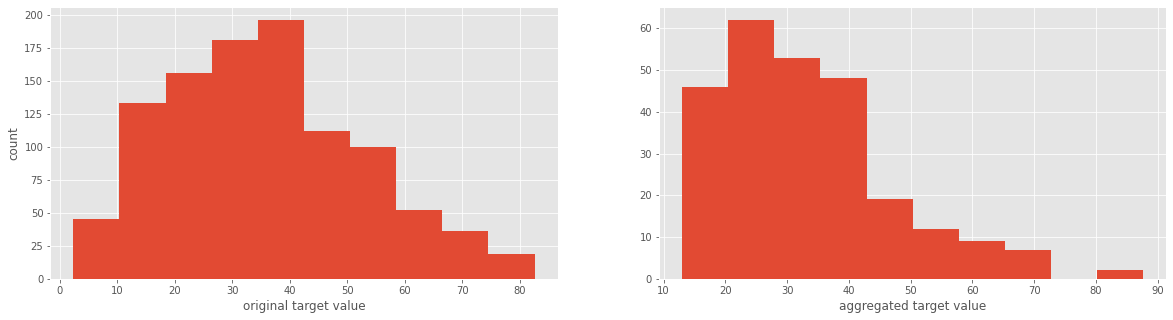

In [32]:
plt.figure(figsize=(20,5))
plt.subplot(1, 2, 1 )
plt.hist(targets)
plt.xlabel('original target value')
plt.ylabel('count')
plt.subplot(1, 2, 2)
plt.hist(y_pred)
plt.xlabel('aggregated target value')
plt.show()